In [2]:
# ensure python version is more than 3.5
import sys
assert sys.version_info >= (3,5)

# ensure scikit version is >=0.20
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

##Data generation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# generate some data for classification
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
# split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##Hard voting

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# initialize three classifiers
lr_clf = LogisticRegression(solver='lbfgs',random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma='scale',random_state=42)

# democratic voting classifier
voting_clf = VotingClassifier(estimators=[('lr',lr_clf),('rf',rf_clf),('svm',svm_clf)],voting='hard')

In [5]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(random_state=42))])

In [6]:
from sklearn.metrics import accuracy_score

for clf in (lr_clf, rf_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


##Soft voting

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# initialize three classifiers
lr_clf = LogisticRegression(solver='lbfgs',random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma='scale',probability=True, random_state=42)

# democratic voting classifier
voting_clf = VotingClassifier(estimators=[('lr',lr_clf),('rf',rf_clf),('svm',svm_clf)],voting='soft')

In [8]:
from sklearn.metrics import accuracy_score

for clf in (lr_clf, rf_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


##Bagging ensembles

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('accuracy_score : {}'.format(accuracy_score(y_pred, y_test)))

accuracy_score : 0.904


In [10]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('accuracy_score: {}'.format(accuracy_score(y_pred, y_test)))

accuracy_score: 0.856


## Random Forests

In [11]:
# create a manual random forest
rf_clf = BaggingClassifier(DecisionTreeClassifier(max_features='sqrt'),
                           n_estimators=500, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('accuracy_score: {}'.format(accuracy_score(y_pred, y_test)))

accuracy_score: 0.896


## Feature Importance

/Users/saip/Library/Python/3.9/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


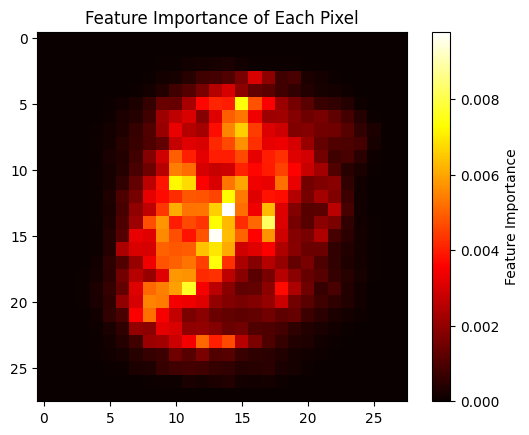

In [14]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Function to plot the feature importance
def plot_feature_importance(imp):
    plt.imshow(imp, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Feature Importance')
    plt.title('Feature Importance of Each Pixel')
    plt.show()

# load the data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# set target as numerical type
mnist.target = mnist.target.astype(np.uint8)

# train a random forest classifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

# plot the feature importance
imp = rnd_clf.feature_importances_
reshaped_imp = imp.reshape(28, 28)
plot_feature_importance(reshaped_imp)

## Gradient Boosting Regressor

In [31]:
# create a synthetic dataset for regression with just two features
from sklearn.datasets import make_regression

# n_features vs n_informative
X, y = make_regression(n_samples=1000, n_features=2, n_informative=2,
                       n_targets=1, noise=0.1, random_state=42)

# Transform y to make the task non-linear
# For a cubic regression task:
y = y**3 + 0.1 * np.random.randn(1000)

# normalize y
y = (y - y.mean()) / y.std()

# split the data for train, validation and test (0.8, 0.1, 0.1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5,
                                                random_state=42)

# print some X_train and y_train
print(X_train[:5])
print(y_train[:5])



[[-0.13263375 -0.9745293 ]
 [ 1.26570784 -0.86617485]
 [ 0.73846658  0.17136828]
 [-1.50472037  0.76005596]
 [-0.22346279  0.71400049]]
[-0.03616968  0.37645699  0.10045114 -0.7773591  -0.02939468]


In [ ]:


# train gradient boosting regressor using decision tree regressor without using prebuilt model
# vary number of trees
from sklearn.tree import DecisionTreeRegressor

learning_rate = 0.1 
num_trees = [5, 20, 100]
gb_regs = []

for n in num_trees:
    residuals = y_train
    models = []
    for idx in range(n):
        single_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
        single_reg.fit(X_train, residuals)
        # get residuals of y_train
        y_pred = single_reg.predict(X_train)
        residuals = residuals - learning_rate*y_pred
        models.append(single_reg)
    gb_regs.append(models)

# To make predictions with this model, you would need to sum up the predictions from all the trees in the ensemble:
def predict(X, models):
    predictions = np.zeros(X.shape[0])
    for model in models:
        predictions += learning_rate * model.predict(X)
    return predictions

# plot the predictions for both sizes of trees
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for idx, num in enumerate(num_trees):
    plt.subplot(1,len(num_trees),idx+1)
    plt.title('Prediction with {} trees'.format(num))
    plt.scatter(X_train[:, 0], y_train, c='b', label='train')
    # plot the fitted regression line
    y_pred = predict(X_train, gb_regs[idx])
    # Sort X_train and y_pred by the x-values
    sorted_indices = X_train[:, 0].argsort()
    X_train_sorted = X_train[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.plot(X_train_sorted[:, 0], y_pred_sorted, c='r', label='prediction')
    plt.legend()



best number of trees: 102
test error: 0.010986550296155997


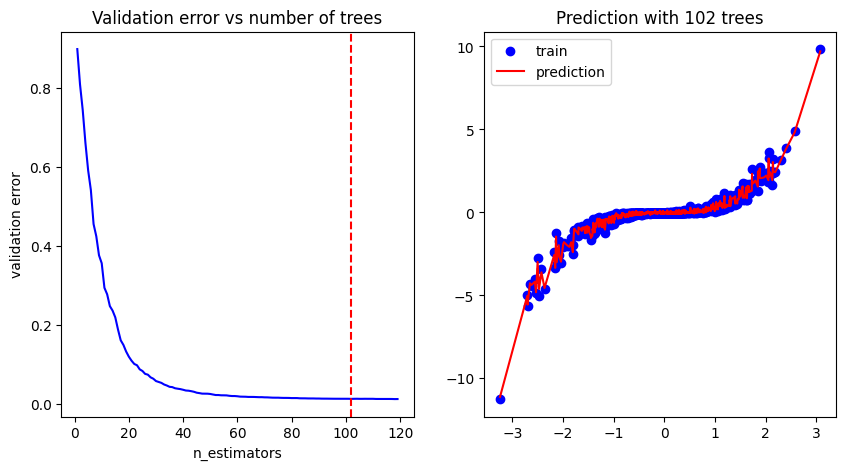

In [32]:
# early stopping to find optimal number of trees
from sklearn.metrics import mean_squared_error
# import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# initialize the model
gb_reg = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

# initialize the variables
val_errors = []
min_val_error = float('inf')
error_going_up = 0
best_num_trees = 0

# train the model
for n_estimators in range(1, 120):
    gb_reg.n_estimators = n_estimators
    gb_reg.fit(X_train, y_train)
    y_pred = gb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    val_errors.append(val_error)

# find the best number of trees
for idx, val_error in enumerate(val_errors):
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
        best_num_trees = idx+1
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

print('best number of trees: {}'.format(best_num_trees))

# train the model with best number of trees
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=best_num_trees,
                                   random_state=42)
gb_reg.fit(X_train, y_train)
y_pred = gb_reg.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print('test error: {}'.format(test_error))

# plot val_error with n_estimators and also plot the regression line 
# for best number of trees
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Validation error vs number of trees')
plt.plot(range(1, 120), val_errors, c='b')
plt.xlabel('n_estimators')
plt.ylabel('validation error')
plt.axvline(x=best_num_trees, c='r', linestyle='--')
plt.subplot(1,2,2)
plt.title('Prediction with {} trees'.format(best_num_trees))
plt.scatter(X_train[:, 0], y_train, c='b', label='train')
# plot the fitted regression line
y_pred = gb_reg.predict(X_train)
# Sort X_train and y_pred by the x-values
sorted_indices = X_train[:, 0].argsort()
X_train_sorted = X_train[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
plt.plot(X_train_sorted[:, 0], y_pred_sorted, c='r', label='prediction')
plt.legend()
plt.show()


## Gradient Boosting Classifier - AdaBoost

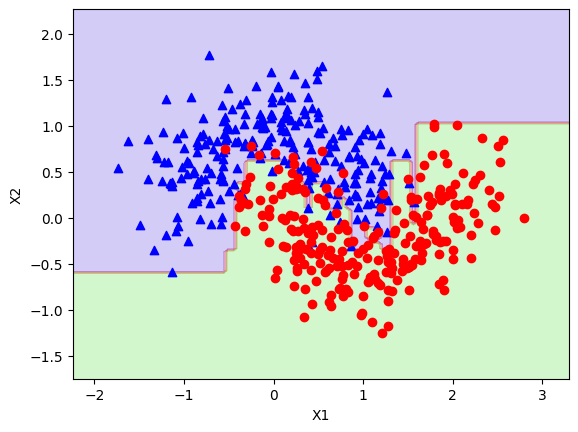

In [15]:
# train an adaboost classifier with decision tree as base estimator
from sklearn.ensemble import AdaBoostClassifier


# Function to plot the decision boundary for a binary classifier
def plot_decision_boundary(clf, X, y):
    # create a meshgrid
    x1s = np.linspace(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, 100)
    x2s = np.linspace(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, 100)
    
    # meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays
    x1, x2 = np.meshgrid(x1s, x2s)
    # predict the output for the meshgrid
    y_pred = clf.predict(np.c_[x1.ravel(), x2.ravel()])
    y_pred = y_pred.reshape(x1.shape)

    # plot the contour for the decision boundary
    # coutourf function is used to plot the contour for the decision boundary
    # it takes the x1, x2 and y_pred as input
    # cmap is the color map to use for the contour
    # alpha is the transparency of the contour
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)
    # plot the actual data
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], c='b', marker='^')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], c='r', marker='o')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

# algorithm is the hyperparameter that controls the boosting algorithm to use (SAMME or SAMME.R)
# SAMME.R relies on class probabilities rather than predictions and generally performs better
# SAMME is the default algorithm and relies on class predictions
# learning rate is the hyperparameter that controls how much each classifier is allowed to learn from the previous one

# train an adaboost classifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.5, random_state=42)

ada_clf.fit(X_train, y_train)

plot_decision_boundary(ada_clf, X, y)

In [ ]:
# show how adaboost can overfit the data if not controlled compared to random forest
# train a random forest classifier
rnd_clf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
# plot the decision boundary
plot_decision_boundary(rnd_clf, X, y)

# train an adaboost classifier that overfits the data
